# Import libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Collection

In [53]:
X_train= pd.read_csv("./Training Data/Linear_X_Train.csv")
Y_train= pd.read_csv("./Training Data/Linear_Y_Train.csv")
X_train = X_train.values
Y_train = Y_train.values

# Normalisation

In [54]:
mean= np.mean(X_train)
std= np.std(X_train)
X_train= (X_train-mean)/std
print(mean, std)

-0.03779466168006855 0.9920801322508517


# Analyzing Data

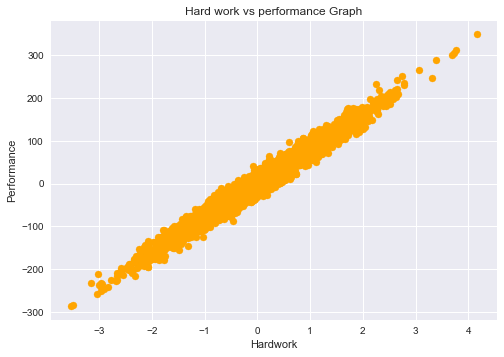

In [75]:
plt.style.use("seaborn")
plt.scatter(X_train, Y_train, color="orange")
plt.title("Hard work vs performance Graph")
plt.xlabel("Hardwork")
plt.ylabel("Performance")
plt.show()

# Code

In [76]:
def error(X, Y, theta):
    m= X.shape[0]
    err = sum((theta[1]*X+ theta[0] - Y)**2)
    return err/m

def gradient(X, Y, theta):
    grad= np.zeros((2))
    m= X.shape[0]
    for i in range(m):
        grad[0]+=X[i]*theta[1] + theta[0] - Y[i]
        grad[1]+=X[i]*(X[i]*theta[1] + theta[0] - Y[i])
    grad=grad/m
    return grad

def gradient_descendent(X, Y, rate=0.1, steps=100):
    errors=[]
    theta=np.zeros((2))
    for i in range(steps):
        grad= gradient(X, Y, theta)
        theta[0]= theta[0]- rate*grad[0]
        theta[1]= theta[1]- rate*grad[1]
        errors.append(error(X, Y, theta))
    return theta , errors
        
        
        
    

In [95]:
theta, errors= gradient_descendent(X_train, Y_train, steps=1000, rate=0.01)

[ 0.68383944 79.90228731]


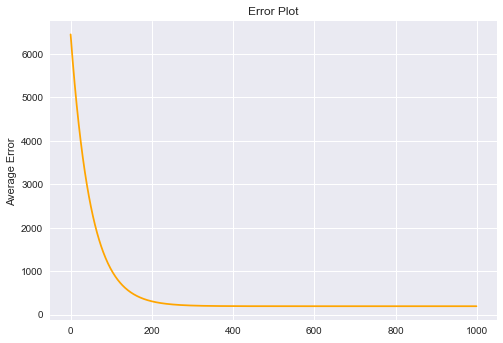

In [96]:
print(theta)
plt.plot(errors, color="orange")
plt.title("Error Plot")
plt.ylabel("Average Error ")
plt.show()

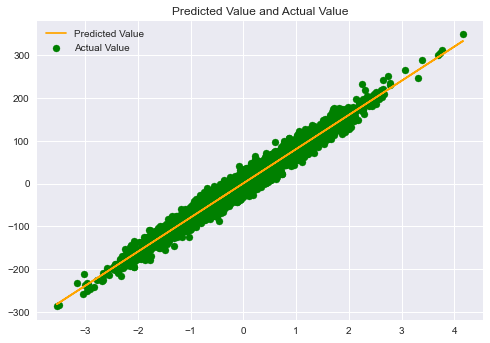

In [97]:
plt.plot(X_train, X_train*theta[1] + theta[0], color="orange",label="Predicted Value")
plt.scatter(X_train, Y_train, color="green", label="Actual Value")
plt.legend()
plt.title("Predicted Value and Actual Value")
plt.show()

In [98]:
X_test= pd.read_csv("./Test Cases/Linear_X_Test.csv")
X_test = X_test.values
Y_test= X_test*theta[1]+theta[0]
Y_test = pd.DataFrame(Y_test, columns=["y"])
Y_test.to_csv("sample_submission.csv", index=False)